In [75]:
from helpers import *
from gaussfit import *

In [76]:
# list of PMTs at 0 voltage form HV files
# + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]

# drifting PMTs --> wait for full list
driftPMTs = [ 59, 63, 81, 93, 95, 142, 148, 169, 170, 179, 282]
drift_channels = PMTid_to_channel(driftPMTs)
print(drift_channels)

[305, 292, 270, 265, 267, 219, 214, 192, 191, 182, 79]


Loading data from: ../calibrationdb/backgroundphotons_run9228_1670519753.csv


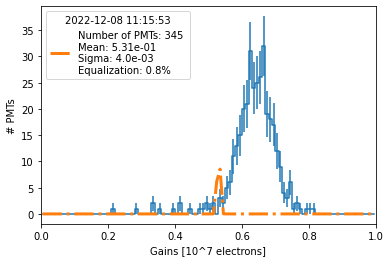

In [106]:
#file = "../calibrationdb/backgroundphotons_run9226_1670516550.csv" #nominal #getMostRecentCalibration()
#file = "../calibrationdb/backgroundphotons_run9227_1670518289.csv" #+50V
#file = "../calibrationdb/backgroundphotons_run9228_1670519753.csv" #+100V
#file = "../calibrationdb/backgroundphotons_run9229_1670521305.csv" #-30V
#file = "../calibrationdb/backgroundphotons_run9230_1670522684.csv" #-50V

timestamp=getTimestamp(file)

print( "Loading data from: "+ file )

data = getDataFrame(file, offPMTs, False)

data[["pmt", "q", "eq"]].to_csv("histogram_run9208_1670178880.csv")

fitOutput  = fitGainsDistribution( data, BINSIZE=0.01,RMIN=0.0,RMAX=1.0, p0=(0.5, 0.04) )

plt.xlim((0.0, 1.0))
plt = makeplot(timestamp, "fit_test.pdf", *fitOutput )

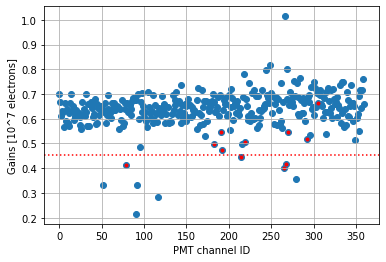

In [107]:
plt.scatter(data["pmt"],data["q"],marker="o")

drift_channels = PMTid_to_channel(driftPMTs)
drift_data = data[data['pmt'].isin(drift_channels)]
plt.scatter(drift_data["pmt"],drift_data["q"],marker=".",color="red")
plt.axhline(y=0.452, color="red", linestyle='dotted')

plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

In [108]:
ch_high = data.loc[ data["q"] > 0.54, "pmt"]
ch_low = data.loc[ data["q"] < 0.3, "pmt"]

print("PMT channels above 0.54")
pmt_high = channel_to_PMTid(ch_high)
print("Channel ID:")
print( ch_high.to_numpy() )
print("PMT ID:")
print( pmt_high )

PMT channels above 0.54
Channel ID:
[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  53  54  55  56  57
  58  60  61  62  63  64  65  66  67  68  69  70  72  73  74  75  76  77
  78  80  81  82  83  84  85  86  87  88  89  90  93  94  96  97  98  99
 100 101 102 104 105 106 107 108 109 110 111 112 113 114 115 116 118 119
 120 121 122 123 124 125 126 128 129 130 132 133 134 135 136 137 138 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 162 163 164 165 166 167 168 169 170 171 173 174 175 176 177 178
 179 180 181 183 184 185 186 187 188 189 191 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 217 218 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 249 250 251 252 253 254 255 256 257 258
 259 260 261 26

PMT channels below 0.4:
Channel ID:
[ 91 117]
PMT ID:
[262, 248]
[0.215235 0.281614]


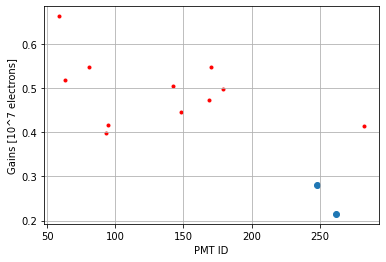

In [109]:
print("PMT channels below 0.4:" )
pmt_low = channel_to_PMTid(ch_low)
print("Channel ID:")
print( ch_low.to_numpy() )
print("PMT ID:")
print( pmt_low )

q_low = data.loc [ data["q"] < 0.3, "q"]
plt.scatter(pmt_low,q_low,marker="o")
plt.scatter(channel_to_PMTid(drift_data["pmt"].to_numpy()),drift_data["q"].to_numpy(),marker=".",color="red")
plt.xlabel("PMT ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

print( q_low.to_numpy())